In [ ]:
############## -- Machine Learning Inmersion --#############
# Modelos : Predictivo
# Autores : Amilcar Paredes
#           Edwin Velarde
#########################################################################

## Nos conectamos al drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importamos librerias

In [ ]:
import pandas as pd ## Manejo de dataframes o set de datos
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

%matplotlib inline

## Leemos los datos o el dataset a trabajar

In [1]:
pathdataset ="/content/drive/My Drive/Colab Notebooks/Curso/Trabajo/AdquisicionAhorro.csv"
datasetoriginal = pd.read_csv(pathdataset) 



NameError: ignored

In [ ]:
datasetoriginal.head(3)

,coddoc,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo,Adq_Ahorro
0,CODDOC0001,30,married,primaria,no,1787,no,no,19,79,1,-1,0,0
1,CODDOC0002,33,married,secundaria,no,4789,si,si,11,220,1,339,4,0
2,CODDOC0003,35,single,terciario,no,1350,si,no,16,185,1,330,1,0


## Observacioms la data

In [ ]:
datasetoriginal.shape
# Son 2240 obs con 14 columnas


(2240, 14)

In [ ]:
#Leer los primeros registros.
# Podemos ver la estructura de los datos, es el str de Python
datasetoriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
coddoc        2240 non-null object
edad          2240 non-null int64
estciv        2240 non-null object
educacion     2240 non-null object
mora          2240 non-null object
balance       2240 non-null int64
vivienda      2240 non-null object
prestamo      2240 non-null object
dia           2240 non-null int64
duracion      2240 non-null int64
campana       2240 non-null int64
pdias         2240 non-null int64
previo        2240 non-null int64
Adq_Ahorro    2240 non-null int64
dtypes: int64(8), object(6)
memory usage: 245.1+ KB


In [ ]:
# Tabla Resumen
datasetoriginal.describe(include='all') # Describir todas las variables.


,coddoc,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo,Adq_Ahorro
count,2240,2240.000000,2240,2240,2240,2240.000000,2240,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
unique,2240,NaN,3,4,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,CODDOC2660,NaN,married,secundaria,no,NaN,si,no,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,1392,1134,2207,NaN,1286,1899,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,41.228125,NaN,NaN,NaN,1424.717857,NaN,NaN,15.910714,257.935714,2.832143,37.482589,0.519643,0.115179
std,NaN,10.507201,NaN,NaN,NaN,3118.413754,NaN,NaN,8.241664,248.570889,3.205127,94.996686,1.549991,0.319309
min,NaN,19.000000,NaN,NaN,NaN,-3313.000000,NaN,NaN,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,NaN,33.000000,NaN,NaN,NaN,63.000000,NaN,NaN,9.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,NaN,39.500000,NaN,NaN,NaN,437.000000,NaN,NaN,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,NaN,48.000000,NaN,NaN,NaN,1503.750000,NaN,NaN,21.000000,319.250000,3.000000,-1.000000,0.000000,0.000000


In [ ]:
datasetoriginal.isnull().sum()

coddoc        0
edad          0
estciv        0
educacion     0
mora          0
balance       0
vivienda      0
prestamo      0
dia           0
duracion      0
campana       0
pdias         0
previo        0
Adq_Ahorro    0
dtype: int64

0 Registros con valores nulos


## Transforamcion de Variables
Los campos Vivienda, Prestamo,mora se convertiran en valos 0 y 1

In [ ]:
# creamos arrays por tipo de columnas
columnas_categoricas = ["estciv","educacion","mora","vivienda","prestamo"]
columnas_numericas = ["edad","balance","dia","duracion","campana","pdias","previo"]

###LabelEncoder

In [ ]:
# Preprocesamiento con LabelEncoder

from sklearn.preprocessing import LabelEncoder # PasoN°01: Importo la libreria a usar
for c in columnas_categoricas:
    print(str(c))
    le = LabelEncoder()                     #   PasoN°02: Instancio la funcion a desarrollar
    le.fit(datasetoriginal[str(c)])                #   PasoN°03: Ajusto la funcion
    datasetoriginal[str(c)]=le.transform(datasetoriginal[str(c)]) #   PasoN°04: Ejecuto la funcion

estciv
educacion
mora
vivienda
prestamo


In [ ]:
datasetoriginal.head()

,coddoc,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo,Adq_Ahorro
0,CODDOC0001,30,1,1,0,1787,0,0,19,79,1,-1,0,0
1,CODDOC0002,33,1,2,0,4789,1,1,11,220,1,339,4,0
2,CODDOC0003,35,2,3,0,1350,1,0,16,185,1,330,1,0
3,CODDOC0004,30,1,3,0,1476,1,1,3,199,4,-1,0,0
4,CODDOC0006,35,2,3,0,747,0,0,23,141,2,176,3,0


In [ ]:
datasetoriginal.describe(include='all') # Describir todas las variables.

,coddoc,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo,Adq_Ahorro
count,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
unique,2240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CODDOC2660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,41.228125,1.146429,2.056696,0.014732,1424.717857,0.574107,0.152232,15.910714,257.935714,2.832143,37.482589,0.519643,0.115179
std,NaN,10.507201,0.597737,0.794634,0.120506,3118.413754,0.494588,0.359326,8.241664,248.570889,3.205127,94.996686,1.549991,0.319309
min,NaN,19.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,NaN,33.000000,1.000000,2.000000,0.000000,63.000000,0.000000,0.000000,9.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,NaN,39.500000,1.000000,2.000000,0.000000,437.000000,1.000000,0.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,NaN,48.000000,2.000000,3.000000,0.000000,1503.750000,1.000000,0.000000,21.000000,319.250000,3.000000,-1.000000,0.000000,0.000000


###Modificacion de campos



In [ ]:
## Debido al valor -1 para los clientes previamente no contactos se crea una columna con los valores 1 si han sido previamente contactados y 0 si no han sido previamente contactados
 datasetoriginal['contactado']= 1


rows = (datasetoriginal['pdias'] == -1)
datasetoriginal.loc[rows, 'contactado'] = 0
#datasetoriginal['contactado'] =0
 


In [ ]:
 #Campo edad acotado
 datasetoriginal['edadacotado']=  datasetoriginal['edad']

 rows= (datasetoriginal['edad'] >= 65)

 datasetoriginal.loc[rows, 'edadacotado'] = 65




In [ ]:
#campo balance acotado
datasetoriginal['balanceacotado']=  datasetoriginal['balance']

rows= (datasetoriginal['balance'] >= 4000)

datasetoriginal.loc[rows, 'balanceacotado'] = 4000

rows= (datasetoriginal['balance'] <= -1000)

datasetoriginal.loc[rows, 'balanceacotado'] = -1000

In [ ]:
#campo balance clase

datasetoriginal['balanceclase']=  1

rows= (datasetoriginal['balance'] >= -1000)
datasetoriginal.loc[rows, 'balanceclase'] = 2

rows= (datasetoriginal['balance'] >= -250)
datasetoriginal.loc[rows, 'balanceclase'] = 3

rows= (datasetoriginal['balance'] >= 0)
datasetoriginal.loc[rows, 'balanceclase'] = 4

rows= (datasetoriginal['balance'] >= 500)
datasetoriginal.loc[rows, 'balanceclase'] = 5

rows= (datasetoriginal['balance'] >= 2000)
datasetoriginal.loc[rows, 'balanceclase'] = 6

rows= (datasetoriginal['balance'] >= 4000)
datasetoriginal.loc[rows, 'balanceclase'] = 7

rows= (datasetoriginal['balance'] >= 8000)
datasetoriginal.loc[rows, 'balanceclase'] = 8

rows= (datasetoriginal['balance'] >= 16000)
datasetoriginal.loc[rows, 'balanceclase'] = 9

In [ ]:
 #Campo duracion acotado
 datasetoriginal['duracionacotado']=  datasetoriginal['duracion']

 rows= (datasetoriginal['duracion'] >= 500)

 datasetoriginal.loc[rows, 'duracionacotado'] = 500

In [ ]:
#Campo campana acotado
 datasetoriginal['campanaacotado']=  datasetoriginal['campana']

 rows= (datasetoriginal['campana'] >= 6)

 datasetoriginal.loc[rows, 'campanaacotado'] = 6

In [ ]:
#creamos campo de campana + previo
 datasetoriginal['contactostotal']=  datasetoriginal['campana'] +datasetoriginal['previo']

## Analizamos variables

### EstadoCivil

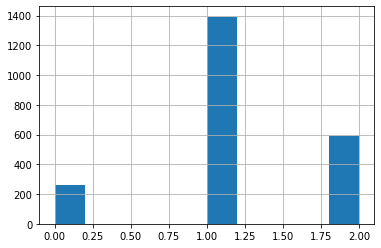

In [ ]:
# Análisis Univariado de los atributos del data set
%matplotlib inline
import matplotlib.pyplot as plt
datasetoriginal['estciv'].hist()

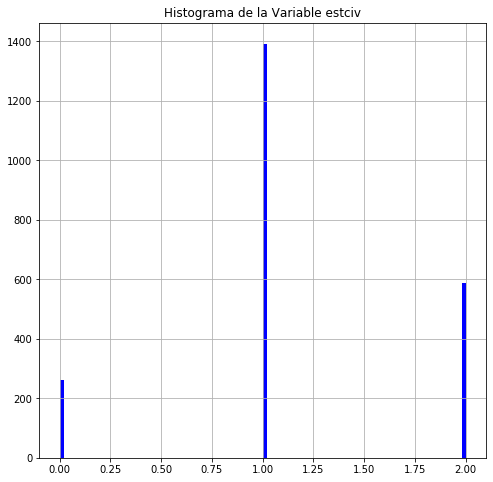

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable estciv')
datasetoriginal['estciv'].hist(figsize=(8,8),color="blue",bins=100)

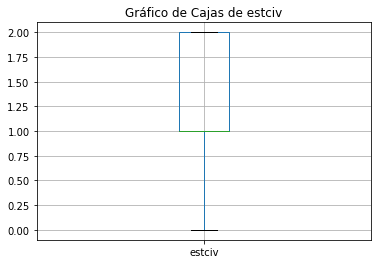

In [ ]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de estciv')
#train.boxplot(column='estciv',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
datasetoriginal.boxplot(column='estciv')

### Edad
se creara un campo edad acotado, los mayores de 65 se le asignara el valor 65

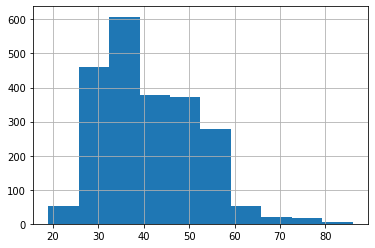

In [ ]:
# Análisis Univariado de los atributos del data set
%matplotlib inline
import matplotlib.pyplot as plt
datasetoriginal['edad'].hist()

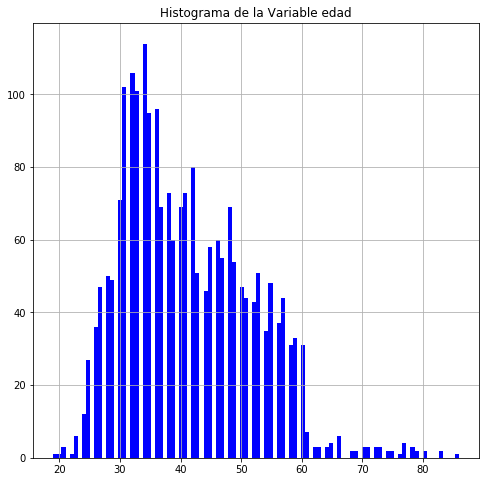

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable edad')
datasetoriginal['edad'].hist(figsize=(8,8),color="blue",bins=100)

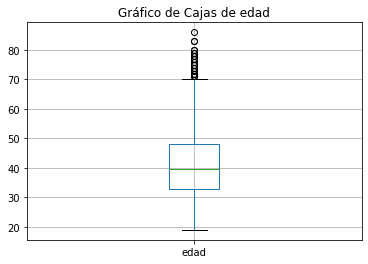

In [ ]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de edad')
#train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
datasetoriginal.boxplot(column='edad')

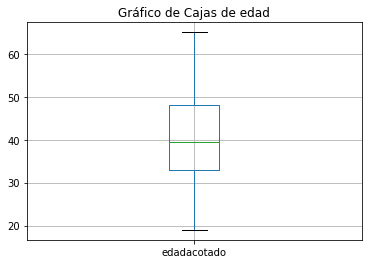

In [ ]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de edad')
#train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
datasetoriginal.boxplot(column='edadacotado')

###Balance
Se creara el campo Balanceacotado , se asiganara 10000 a todos los que tenga su valor sobre este numero

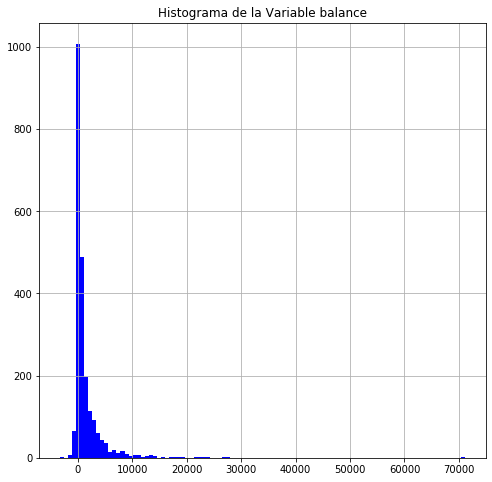

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable balance')
datasetoriginal['balance'].hist(figsize=(8,8),color="blue",bins=100)

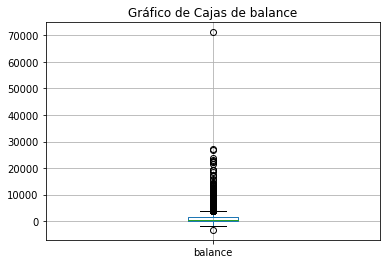

In [ ]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de balance')
#datasetoriginal.boxplot(column='balance',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
datasetoriginal.boxplot(column='balance')

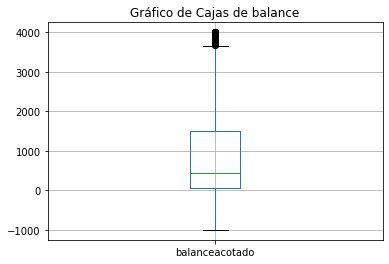

In [ ]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de balance')
#datasetoriginal.boxplot(column='balance',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
datasetoriginal.boxplot(column='balanceacotado')

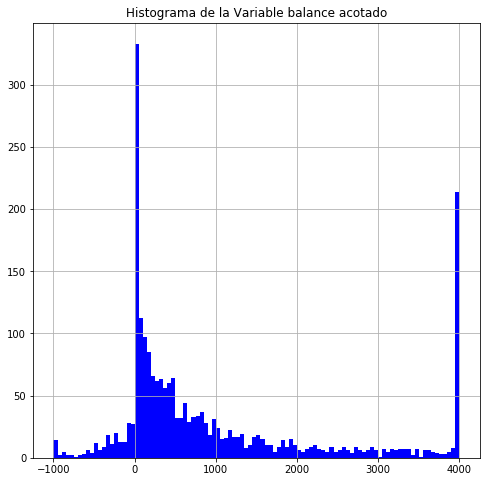

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable balance acotado')
datasetoriginal['balanceacotado'].hist(figsize=(8,8),color="blue",bins=100)

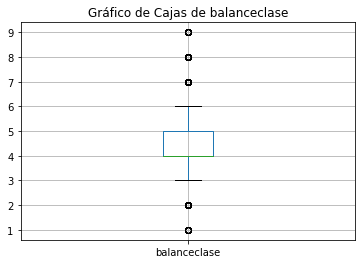

In [ ]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de balanceclase')
#datasetoriginal.boxplot(column='balance',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
datasetoriginal.boxplot(column='balanceclase')

###dia


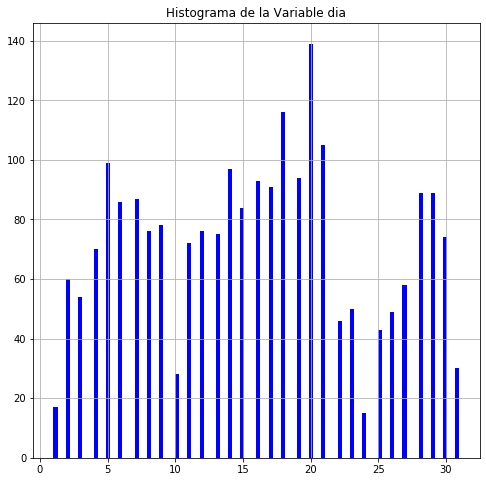

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable dia')
datasetoriginal['dia'].hist(figsize=(8,8),color="blue",bins=100)

###duracion
se creo campo duracionclase , agrupando los valores


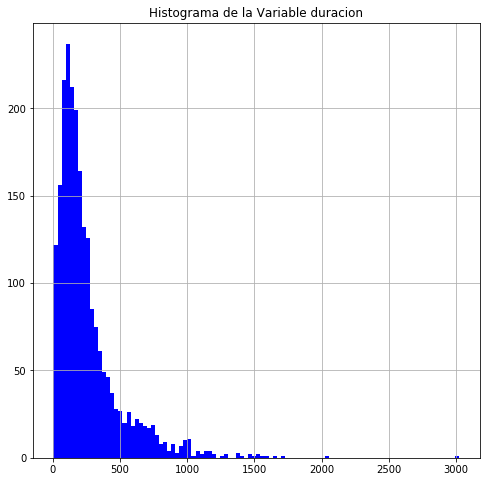

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable duracion')
datasetoriginal['duracion'].hist(figsize=(8,8),color="blue",bins=100)

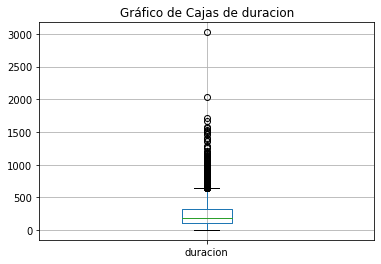

In [ ]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de duracion')
#datasetoriginal.boxplot(column='balance',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
datasetoriginal.boxplot(column='duracion')

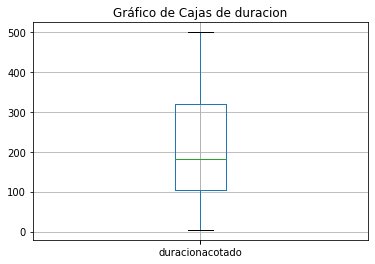

In [ ]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
datasetoriginal.boxplot(column='duracionacotado')
plt.title('Gráfico de Cajas de duracion')
#datasetoriginal.boxplot(column='balance',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
datasetoriginal.boxplot(column='duracionacotado')

###Campana
se crea el campo campana acotado

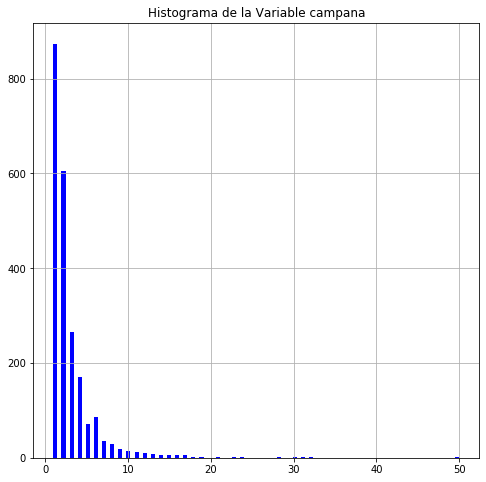

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable campana')
datasetoriginal['campana'].hist(figsize=(8,8),color="blue",bins=100)

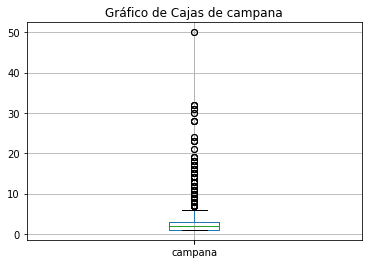

In [ ]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
datasetoriginal.boxplot(column='campana')
plt.title('Gráfico de Cajas de campana')
#datasetoriginal.boxplot(column='balance',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
datasetoriginal.boxplot(column='campana')

Text(0.5, 1.0, 'Gráfico de Cajas de campana')

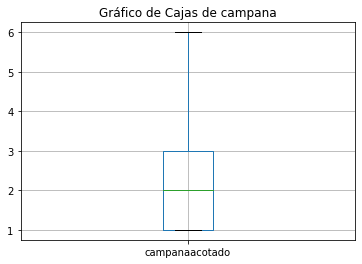

In [ ]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
datasetoriginal.boxplot(column='campanaacotado')
plt.title('Gráfico de Cajas de campana')
#datasetoriginal.boxplot(column='balance',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
#datasetoriginal.boxplot(column='campanaacotado')

##Crear test y train

In [ ]:
#se elimina el campo de codigo
datasetoriginal= datasetoriginal.drop('coddoc',axis=1)

In [ ]:
datasetoriginal

,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo,Adq_Ahorro,contactado,edadacotado,balanceacotado,balanceclase,duracionacotado,campanaacotado,contactostotal
0,30,1,1,0,1787,0,0,19,79,1,-1,0,0,0,30,1787,5,79,1,1
1,33,1,2,0,4789,1,1,11,220,1,339,4,0,1,33,4000,7,220,1,5
2,35,2,3,0,1350,1,0,16,185,1,330,1,0,1,35,1350,5,185,1,2
3,30,1,3,0,1476,1,1,3,199,4,-1,0,0,0,30,1476,5,199,4,4
4,35,2,3,0,747,0,0,23,141,2,176,3,0,1,35,747,5,141,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,49,1,2,0,322,0,0,14,356,2,-1,0,0,0,49,322,4,356,2,2
2236,38,1,2,0,1205,1,0,20,45,4,153,1,0,1,38,1205,5,45,4,5
2237,57,1,3,1,-3313,1,1,9,153,1,-1,0,0,0,57,-1000,1,153,1,1
2238,57,1,2,0,295,0,0,19,151,11,-1,0,0,0,57,295,4,151,6,11


In [ ]:
## Si deseamos balancear, podemos hacerlo con toda la informacion?
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datasetoriginal.drop('Adq_Ahorro', axis=1), # (X,y,%test,estratificacion)
                                                    datasetoriginal['Adq_Ahorro'], 
                                                    test_size=0.33,
                                                    stratify=datasetoriginal['Adq_Ahorro'],
                                                    random_state=100)

##Seleccion de variable

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
X_train.head(4) # Eliminamos el ID
y_train.describe(include='all') # Describir todas las variables.


count    1500.000000
mean        0.115333
std         0.319530
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Adq_Ahorro, dtype: float64

In [ ]:
# Seleccion por Random Forest
from sklearn.ensemble import RandomForestClassifier # Paso01: Instancio el algoritmo
forest = RandomForestClassifier()                   # Paso02: Configuro el algoritmo
forest.fit(X_train, y_train,)                        # Paso03: Ajuste el algoritmo
importances = forest.feature_importances_           # Variables importantes

In [ ]:
importances            # Variables importantes


array([0.06998736, 0.02424302, 0.02863056, 0.003196  , 0.0866899 ,
       0.02629004, 0.01054211, 0.08437652, 0.16869204, 0.02325979,
       0.0562263 , 0.02910796, 0.0094993 , 0.06776356, 0.08112958,
       0.0261546 , 0.14604697, 0.02506686, 0.03309752])

In [ ]:
# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(X_train.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,duracion,0.168692
1,duracionacotado,0.146047
2,balance,0.086690
3,dia,0.084377
4,balanceacotado,0.081130
5,edad,0.069987
6,edadacotado,0.067764
7,pdias,0.056226
8,contactostotal,0.033098
9,previo,0.029108


## BOruta

In [ ]:
# Instalamos Boruta
! pip install Boruta

In [ ]:
# Seleccion Boruta (Permutaciones de arboles)
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

rfc = RandomForestClassifier()
boruta_selector = BorutaPy(rfc, n_estimators='auto',verbose=5 )

x=X_train.values
y=y_train.values

boruta_selector.fit(x,y)

print("==============BORUTA==============")
print (boruta_selector.n_features_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	15
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	15
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	15
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	15
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	16
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	16
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	16
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	16
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	16
I

In [ ]:
X_train_Bor = X_train.columns[boruta_selector.support_]
X_train_Bor

Index(['duracion', 'duracionacotado'], dtype='object')

##Regresión Logística Binaria ##

In [ ]:
# Paso N°01: Llamar un algoritmo predictivos
from sklearn.linear_model import LogisticRegression

RegLog = LogisticRegression(C=0.1,penalty='l2') # Paso N°02: Configuro el algoritmo
RegLog.fit(X_train, y_train)  # Paso N°03: Entreno o ajusto el algoritmo predictivo a los datos

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=RegLog.predict(X_train) # Prediccion sobre el train
y_pred_test= RegLog.predict(X_test) # Prediccion sobre el test

In [ ]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[1300   27]
 [ 154   19]]
Matriz confusion: Test
[[647   8]
 [ 66  19]]
Accuracy: Train
0.8793333333333333
Accuracy: Test
0.9
Precision: Train
0.41304347826086957
Precision: Test
0.7037037037037037
Recall: Train
0.10982658959537572
Recall: Test
0.2235294117647059


##XGBOOST

In [ ]:
! pip install xgboost

In [ ]:
# Importamos la librería necesaria para el algoritmo
import xgboost as xgb

In [ ]:
# En Xgboost necesitamos convertir nuestras matrices a matriz XGboost
# Uso eficiente de la memoria y entrenamiento rápido
dtrain = xgb.DMatrix(data=X_train,label =  y_train)
dtest  = xgb.DMatrix(data= X_test,label =  y_test)

In [ ]:
# Eligiendo los parámetros para XGBoost
xgb_params = {
    "objective": "reg:logistic",
    "eta": 0.0001,
    "max_depth": 3,
    "early_stopping_rounds":  50,
    "gamma": 0.1,
    "eval_metric": "auc",
    "print_every_n": 50
}

num_rounds = 250 # Numero de arboles
# Aqui entrenamos el algoritmo
watch_list  = [(dtrain,'train'),(dtest,'test')]
xgb_fit = xgb.train(xgb_params, dtrain, num_rounds, watch_list) # Aca se guarda el algoritmo

[0]	train-auc:0.808255	test-auc:0.75498
[1]	train-auc:0.808255	test-auc:0.75498
[2]	train-auc:0.808255	test-auc:0.75498
[3]	train-auc:0.808255	test-auc:0.75498
[4]	train-auc:0.808255	test-auc:0.75498
[5]	train-auc:0.808255	test-auc:0.75498
[6]	train-auc:0.808255	test-auc:0.75498
[7]	train-auc:0.808255	test-auc:0.75498
[8]	train-auc:0.808255	test-auc:0.75498
[9]	train-auc:0.808255	test-auc:0.75498
[10]	train-auc:0.808255	test-auc:0.75498
[11]	train-auc:0.808255	test-auc:0.75498
[12]	train-auc:0.808255	test-auc:0.75498
[13]	train-auc:0.808255	test-auc:0.75498
[14]	train-auc:0.808255	test-auc:0.75498
[15]	train-auc:0.808255	test-auc:0.75498
[16]	train-auc:0.808255	test-auc:0.75498
[17]	train-auc:0.808255	test-auc:0.75498
[18]	train-auc:0.808255	test-auc:0.75498
[19]	train-auc:0.808255	test-auc:0.75498
[20]	train-auc:0.808255	test-auc:0.75498
[21]	train-auc:0.808255	test-auc:0.75498
[22]	train-auc:0.808255	test-auc:0.75498
[23]	train-auc:0.808255	test-auc:0.75498
[24]	train-auc:0.808255	te

In [ ]:
# Importancia de Variables
frame = { 'Gain':        pd.Series(xgb_fit.get_score(importance_type='gain')),
          'Cover':       pd.Series(xgb_fit.get_score(importance_type='cover')),
          'Weight':      pd.Series(xgb_fit.get_score(importance_type='weight'))}
result = pd.DataFrame(frame) 
result  

,Gain,Cover,Weight
duracion,57.787812,269.963385,355
pdias,15.779538,190.096824,500
edad,9.747515,267.704912,250
vivienda,7.784357,50.998794,250
prestamo,4.245202,19.999882,145
balance,8.248174,30.998929,250


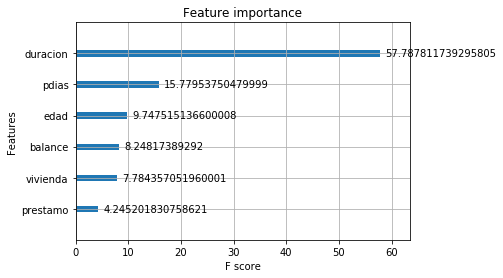

In [ ]:
# Podemos calcular la importancia de variables por Xgboost
xgb.plot_importance(xgb_fit,importance_type='gain')

## LightGBM ##

In [ ]:
import lightgbm as lgb

In [ ]:
dtrain = lgb.Dataset(X_train, label=y_train)
dtest =  lgb.Dataset(X_test,  label=y_test, reference=dtrain)

In [ ]:
params = {
        'task':'train', 
        'is_unbalance': False, 
        'max_dept':1,
        'max_bin': 10,  # max cantidad de cortes de una var. numerica
        'boosting_type': 'gbdt',
        'objective': 'binary',
        #'min_child_weight': 150,
        'metric': 'auc',
        #'min_data_in_leaf': 250,
        'num_leaves': 5,
        'learning_rate': 0.0001,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 10,
        #'min_data_per_group':150 ,
        'verbose': 0,
        'seed ':1234
}

In [ ]:
gbm = lgb.train(params,
                dtrain,
                num_boost_round=10000,
                valid_sets=[dtrain,dtest],
                early_stopping_rounds=100)

[1]	training's auc: 0.801316	valid_1's auc: 0.787472
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.801898	valid_1's auc: 0.791028
[3]	training's auc: 0.802908	valid_1's auc: 0.790202
[4]	training's auc: 0.801898	valid_1's auc: 0.791028
[5]	training's auc: 0.801898	valid_1's auc: 0.791028
[6]	training's auc: 0.801898	valid_1's auc: 0.791028
[7]	training's auc: 0.802708	valid_1's auc: 0.791819
[8]	training's auc: 0.801968	valid_1's auc: 0.790525
[9]	training's auc: 0.803333	valid_1's auc: 0.794612
[10]	training's auc: 0.803333	valid_1's auc: 0.794612
[11]	training's auc: 0.809235	valid_1's auc: 0.801778
[12]	training's auc: 0.834546	valid_1's auc: 0.821356
[13]	training's auc: 0.834493	valid_1's auc: 0.821212
[14]	training's auc: 0.836314	valid_1's auc: 0.82229
[15]	training's auc: 0.836732	valid_1's auc: 0.822757
[16]	training's auc: 0.836414	valid_1's auc: 0.823116
[17]	training's auc: 0.836336	valid_1's auc: 0.823152
[18]	training's auc: 0.836327

In [ ]:
importancia=gbm.feature_importance(importance_type='gain')

def impxgb(valores,variables):
    dictimp={variables[a]:valores[a] for a in range(0,len(variables)) }
    xgimp=sorted(list(dictimp.items()), key=lambda x: x[1],reverse=True)

    return xgimp

ixg=impxgb(importancia,X_train.columns)
pd.Series(ixg)

0            (duracion, 1342.3076152801514)
1     (duracionacotado, 1269.6421947479248)
2                (pdias, 814.5018978118896)
3             (vivienda, 395.3768997192383)
4              (previo, 247.08289909362793)
5                     (contactado, 32.9375)
6                 (dia, 10.063199996948242)
7                               (edad, 0.0)
8                             (estciv, 0.0)
9                          (educacion, 0.0)
10                              (mora, 0.0)
11                           (balance, 0.0)
12                          (prestamo, 0.0)
13                           (campana, 0.0)
14                       (edadacotado, 0.0)
15                    (balanceacotado, 0.0)
16                      (balanceclase, 0.0)
17                    (campanaacotado, 0.0)
18                    (contactostotal, 0.0)
dtype: object

##CATBoost ##


In [ ]:
## Modelos Boosting : CATBoost ##
! pip install catboost

In [ ]:
from catboost import CatBoostClassifier

# Definimos el clasificador
CatBoost=CatBoostClassifier(eval_metric="AUC",
                            one_hot_max_size=20,
                            depth=1, 
                            iterations= 800, 
                            l2_leaf_reg= 2, 
                            learning_rate= 0.0001)

In [ ]:
# Ajustamos un modelo de clasificación
Cat=CatBoost.fit(X_train,y_train)

0:	total: 1.1ms	remaining: 879ms
1:	total: 2.43ms	remaining: 969ms
2:	total: 3.35ms	remaining: 891ms
3:	total: 4.51ms	remaining: 897ms
4:	total: 5.74ms	remaining: 913ms
5:	total: 6.95ms	remaining: 920ms
6:	total: 7.88ms	remaining: 893ms
7:	total: 8.81ms	remaining: 872ms
8:	total: 9.78ms	remaining: 860ms
9:	total: 10.8ms	remaining: 849ms
10:	total: 11.8ms	remaining: 850ms
11:	total: 13.1ms	remaining: 862ms
12:	total: 14.1ms	remaining: 852ms
13:	total: 15.1ms	remaining: 847ms
14:	total: 16ms	remaining: 840ms
15:	total: 17.1ms	remaining: 836ms
16:	total: 18.2ms	remaining: 837ms
17:	total: 19.1ms	remaining: 831ms
18:	total: 20.1ms	remaining: 828ms
19:	total: 21.1ms	remaining: 821ms
20:	total: 22.1ms	remaining: 818ms
21:	total: 23.3ms	remaining: 824ms
22:	total: 24.2ms	remaining: 819ms
23:	total: 25.4ms	remaining: 820ms
24:	total: 26.4ms	remaining: 818ms
25:	total: 27.4ms	remaining: 816ms
26:	total: 28.4ms	remaining: 814ms
27:	total: 29.4ms	remaining: 811ms
28:	total: 30.5ms	remaining: 811m

In [ ]:
# Paso N°04: Predecimos con el algoritmo entrenado sobre el test y evaluamos
y_pred_train=Cat.predict(X_train)
y_pred_test=Cat.predict(X_test)

In [ ]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[1327    0]
 [ 173    0]]
Matriz confusion: Test
[[655   0]
 [ 85   0]]
Accuracy: Train
0.8846666666666667
Accuracy: Test
0.8851351351351351
Precision: Train
0.0
Precision: Test
0.0
Recall: Train
0.0
Recall: Test
0.0


## Eleccion BestModel


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# Definimos si deseamos algun metodo de clasificacion
kfolds = StratifiedKFold(shuffle=True, random_state=1)

In [ ]:
# Creamos una funcion de modelamiento parametrizable
import numpy as np
def run_model(model, X, y):
    model_name = str(model.__class__).split('.')[-1].replace('>','').replace("'",'')
    print(model_name)
    accuracy = []
    f1 = []
    start = int(time.time() * 1000)
    model.fit(X, y)
    y_ = model.predict(X_test)
    accuracy += [accuracy_score(y_test, y_)]
    f1 += [f1_score(y_test, y_)]
    end = int(time.time() * 1000)
    results.loc[len(results)] = [model_name, np.mean(accuracy), np.std(accuracy), 
                                 np.mean(f1), np.std(f1), str(end - start)]

In [ ]:
# Agrupamos las familias de Modelos
def run_linear_models(X, y):
    
    run_model(LogisticRegression(), X_train, y_train)
    run_model(RidgeClassifier(), X_train, y_train)
    run_model(MLPClassifier(max_iter=1000), X_train, y_train)
    
def run_misc_models(X, y):

    run_model(BernoulliNB(), X_train, y_train)
    run_model(KNeighborsClassifier(), X_train, y_train)
    run_model(DecisionTreeClassifier(), X_train, y_train)
    
def run_ensemble_models(X, y):
    run_model(RandomForestClassifier(), X_train, y_train)
    run_model(ExtraTreesClassifier(), X_train, y_train)
    run_model(AdaBoostClassifier(), X_train, y_train)
    run_model(GradientBoostingClassifier(), X_train, y_train)    
    run_model(XGBClassifier(), X_train, y_train)
    run_model(VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)),
                                    ('KNN', KNeighborsClassifier(n_neighbors=10))],
                        voting='soft'), X_train, y_train)

In [ ]:
results = pd.DataFrame(columns=['model', 'accuracy', 'accuracy-std', 'f1-score', 'f1-score-std', 'time'])

In [ ]:
run_linear_models(X_train, y_train)
run_misc_models(X_train, y_train)
run_ensemble_models(X_train, y_train)

LogisticRegression
RidgeClassifier
MLPClassifier
BernoulliNB
KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier
ExtraTreesClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
VotingClassifier


In [ ]:
results.iloc[results['accuracy'].sort_values(ascending=False).index].head(19)

,model,accuracy,accuracy-std,f1-score,f1-score-std,time
20,AdaBoostClassifier,0.898649,0.0,0.444444,0.0,162
8,AdaBoostClassifier,0.898649,0.0,0.444444,0.0,163
0,LogisticRegression,0.895946,0.0,0.318584,0.0,74
12,LogisticRegression,0.895946,0.0,0.318584,0.0,72
21,GradientBoostingClassifier,0.891892,0.0,0.411765,0.0,402
9,GradientBoostingClassifier,0.891892,0.0,0.402985,0.0,416
10,XGBClassifier,0.889189,0.0,0.349206,0.0,140
1,RidgeClassifier,0.889189,0.0,0.196078,0.0,9
13,RidgeClassifier,0.889189,0.0,0.196078,0.0,9
22,XGBClassifier,0.889189,0.0,0.349206,0.0,139


###Eleccion con modelo corto

In [ ]:
#creamos un dataframe2 con los campos seleccionados
camposmasvalorados = ["balance","prestamo","vivienda","edad","pdias","duracion","Adq_Ahorro"]
datasetcampos = datasetoriginal
#datasetoriginal.concat()
datasetcampos= datasetoriginal.drop('estciv',axis=1)
datasetcampos= datasetcampos.drop('educacion',axis=1)
datasetcampos= datasetcampos.drop('mora',axis=1)
datasetcampos= datasetcampos.drop('dia',axis=1)
datasetcampos= datasetcampos.drop('campana',axis=1)
datasetcampos= datasetcampos.drop('previo',axis=1)
datasetcampos= datasetcampos.drop('contactado',axis=1)
datasetcampos= datasetcampos.drop('edadacotado',axis=1)
datasetcampos= datasetcampos.drop('balanceacotado',axis=1)
datasetcampos= datasetcampos.drop('balanceclase',axis=1)
datasetcampos= datasetcampos.drop('duracionacotado',axis=1)
datasetcampos= datasetcampos.drop('campanaacotado',axis=1)
datasetcampos= datasetcampos.drop('contactostotal',axis=1)

datasetcampos.head(5)

In [ ]:
## Si deseamos balancear, podemos hacerlo con toda la informacion?
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(datasetcampos.drop('Adq_Ahorro', axis=1), # (X,y,%test,estratificacion)
                                                    datasetcampos['Adq_Ahorro'], 
                                                    test_size=0.33,
                                                    stratify=datasetcampos['Adq_Ahorro'],
                                                    random_state=100)

In [ ]:
#Eleccion en paralelo, descomnetar
#results = pd.DataFrame(columns=['model', 'accuracy', 'accuracy-std', 'f1-score', 'f1-score-std', 'time'])
#run_linear_models(X_train2, y_train2)
#run_misc_models(X_train2, y_train2)
#run_ensemble_models(X_train2, y_train2)
#results.iloc[results['accuracy'].sort_values(ascending=False).index].head(19)

LogisticRegression
RidgeClassifier
MLPClassifier
BernoulliNB
KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier
ExtraTreesClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
VotingClassifier


,model,accuracy,accuracy-std,f1-score,f1-score-std,time
8,AdaBoostClassifier,0.898649,0.0,0.444444,0.0,163
0,LogisticRegression,0.895946,0.0,0.318584,0.0,74
9,GradientBoostingClassifier,0.891892,0.0,0.402985,0.0,416
10,XGBClassifier,0.889189,0.0,0.349206,0.0,140
1,RidgeClassifier,0.889189,0.0,0.196078,0.0,9
7,ExtraTreesClassifier,0.887838,0.0,0.314050,0.0,225
11,VotingClassifier,0.885135,0.0,0.044944,0.0,388
4,KNeighborsClassifier,0.881081,0.0,0.266667,0.0,52
6,RandomForestClassifier,0.877027,0.0,0.222222,0.0,328
3,BernoulliNB,0.867568,0.0,0.279412,0.0,8


**texto en negrita**##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier # Paso01: Instancio
# Parámetros :
# base_estimator : Es el estimador base sobre la cual el ensamble es constuido.
# n_estimators : Numero de estimadores con los cuales se construye el ensamble.
# random_state : semilla aleatoria
AdaBoost=AdaBoostClassifier(learning_rate=0.9, n_estimators=10000) # Paso02: Especifico
AdaBoost.fit(X_train, y_train) # Paso03: Entrenamiento algoritmo

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.9,
                   n_estimators=10000, random_state=None)

In [ ]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=AdaBoost.predict(X_train) # Prediccion sobre el train
y_pred_test= AdaBoost.predict(X_test) # Prediccion sobre el test

In [ ]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[1327    0]
 [   0  173]]
Matriz confusion: Test
[[608  47]
 [ 52  33]]
Accuracy: Train
1.0
Accuracy: Test
0.8662162162162163
Precision: Train
1.0
Precision: Test
0.4125
Recall: Train
1.0
Recall: Test
0.38823529411764707


##Ejecutar los nuevos leads con AdaBoost


In [ ]:
# Leemos el dataset de implementacion, podria ser una informacion a enivar a campanas
pathdataset ="/content/drive/My Drive/Colab Notebooks/Curso/Trabajo/AdquisicionAhorroProspectos.csv"
datasetnuevo = pd.read_csv(pathdataset) 
#datasetnuevo["Adq_Ahorro"] = 0

In [ ]:
datasetnuevo.describe(include='all') # Describir todas las variables.


,coddoc,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo
count,2281,2281.000000,2281,2281,2281,2281.000000,2281,2281,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000
unique,2281,NaN,3,4,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,CODDOC3799,NaN,married,secundaria,no,NaN,si,no,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,1405,1172,2238,NaN,1273,1931,NaN,NaN,NaN,NaN,NaN
mean,NaN,41.113108,NaN,NaN,NaN,1420.634809,NaN,NaN,15.919772,269.878562,2.755809,42.009645,0.565103
std,NaN,10.645541,NaN,NaN,NaN,2899.532800,NaN,NaN,8.255363,270.405595,3.013492,104.882632,1.823649
min,NaN,19.000000,NaN,NaN,NaN,-2082.000000,NaN,NaN,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,NaN,33.000000,NaN,NaN,NaN,81.000000,NaN,NaN,8.000000,106.000000,1.000000,-1.000000,0.000000
50%,NaN,39.000000,NaN,NaN,NaN,454.000000,NaN,NaN,16.000000,188.000000,2.000000,-1.000000,0.000000
75%,NaN,49.000000,NaN,NaN,NaN,1449.000000,NaN,NaN,21.000000,338.000000,3.000000,-1.000000,0.000000


In [ ]:
#Encoder
# creamos arrays por tipo de columnas
columnas_categoricas = ["estciv","educacion","mora","vivienda","prestamo"]
columnas_numericas = ["edad","balance","dia","duracion","campana","pdias","previo"]

# Preprocesamiento con LabelEncoder

from sklearn.preprocessing import LabelEncoder # PasoN°01: Importo la libreria a usar
for c in columnas_categoricas:
    print(str(c))
    le = LabelEncoder()                     #   PasoN°02: Instancio la funcion a desarrollar
    le.fit(datasetnuevo[str(c)])                #   PasoN°03: Ajusto la funcion
    datasetnuevo[str(c)]=le.transform(datasetnuevo[str(c)]) #   PasoN°04: Ejecuto la funcion

estciv
educacion
mora
vivienda
prestamo


In [ ]:
##  MODIFICACION DE LOS DATOS
## Debido al valor -1 para los clientes previamente no contactos se crea una columna con los valores 1 si han sido previamente contactados y 0 si no han sido previamente contactados
 datasetnuevo['contactado']= 1


rows = (datasetnuevo['pdias'] == -1)
datasetnuevo.loc[rows, 'contactado'] = 0
#datasetoriginal['contactado'] =0

 #Campo edad acotado
 datasetnuevo['edadacotado']=  datasetnuevo['edad']

 rows= (datasetnuevo['edad'] >= 65)

 datasetnuevo.loc[rows, 'edadacotado'] = 65

#campo balance acotado
datasetnuevo['balanceacotado']=  datasetnuevo['balance']

rows= (datasetnuevo['balance'] >= 4000)

datasetnuevo.loc[rows, 'balanceacotado'] = 4000

rows= (datasetnuevo['balance'] <= -1000)

datasetnuevo.loc[rows, 'balanceacotado'] = -1000

#campo balance clase

datasetnuevo['balanceclase']=  1

rows= (datasetnuevo['balance'] >= -1000)
datasetnuevo.loc[rows, 'balanceclase'] = 2

rows= (datasetnuevo['balance'] >= -250)
datasetnuevo.loc[rows, 'balanceclase'] = 3

rows= (datasetnuevo['balance'] >= 0)
datasetnuevo.loc[rows, 'balanceclase'] = 4

rows= (datasetnuevo['balance'] >= 500)
datasetnuevo.loc[rows, 'balanceclase'] = 5

rows= (datasetnuevo['balance'] >= 2000)
datasetnuevo.loc[rows, 'balanceclase'] = 6

rows= (datasetnuevo['balance'] >= 4000)
datasetnuevo.loc[rows, 'balanceclase'] = 7

rows= (datasetnuevo['balance'] >= 8000)
datasetnuevo.loc[rows, 'balanceclase'] = 8

rows= (datasetnuevo['balance'] >= 16000)
datasetnuevo.loc[rows, 'balanceclase'] = 9


 #Campo duracion acotado
 datasetnuevo['duracionacotado']=  datasetnuevo['duracion']

 rows= (datasetnuevo['duracion'] >= 500)

 datasetnuevo.loc[rows, 'duracionacotado'] = 500

 #Campo campana acotado
 datasetnuevo['campanaacotado']=  datasetnuevo['campana']

 rows= (datasetnuevo['campana'] >= 6)

 datasetnuevo.loc[rows, 'campanaacotado'] = 6

 #creamos campo de campana + previo
 datasetnuevo['contactostotal']=  datasetnuevo['campana'] +datasetnuevo['previo']

In [ ]:
df_scoring = datasetnuevo.drop("coddoc",axis=1)

In [ ]:
datasetnuevo.head(5)

,coddoc,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo,contactado,edadacotado,balanceacotado,balanceclase,duracionacotado,campanaacotado,contactostotal
0,CODDOC0005,59,1,2,0,0,1,0,5,226,1,-1,0,0,59,0,4,226,1,1
1,CODDOC0007,36,1,3,0,307,1,0,14,341,1,330,2,1,36,307,4,341,1,3
2,CODDOC0008,39,1,2,0,147,1,0,6,151,2,-1,0,0,39,147,4,151,2,2
3,CODDOC0012,43,1,2,0,264,1,0,17,113,2,-1,0,0,43,264,4,113,2,2
4,CODDOC0013,36,1,3,0,1109,0,0,13,328,2,-1,0,0,36,1109,5,328,2,2


In [ ]:
datasetnuevo.isnull().sum()

coddoc             0
edad               0
estciv             0
educacion          0
mora               0
balance            0
vivienda           0
prestamo           0
dia                0
duracion           0
campana            0
pdias              0
previo             0
contactado         0
edadacotado        0
balanceacotado     0
balanceclase       0
duracionacotado    0
campanaacotado     0
contactostotal     0
dtype: int64

In [ ]:
# Predecimos sobre el set de datos de implementacion con el modelo entrenado
y_scoring = AdaBoost.predict(df_scoring) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
# Juntamos el ID con la clase
data = np.hstack((datasetnuevo['coddoc'].values.reshape(-1,1), y_scoring.reshape(-1,1)))
# Le asignamos nombres a las columnas
df_submmit = pd.DataFrame(data, columns=['coddoc','Adq_Ahorro'])
# Convertimos al formato solicitado por Analytics Vidhya
df_submmit['Adq_Ahorro']=["1" if i == 1 else "0" for i in df_submmit['Adq_Ahorro']]
# Exportamos la solucion
pathdatasetsalida ="/content/drive/My Drive/Colab Notebooks/Curso/Trabajo/resultadoapg.csv"

df_submmit.to_csv(pathdatasetsalida, index=False)

In [ ]:
df_scoring

,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo,contactado,edadacotado,balanceacotado,balanceclase,duracionacotado,campanaacotado,contactostotal
0,59,1,2,0,0,1,0,5,226,1,-1,0,0,59,0,4,226,1,1
1,36,1,3,0,307,1,0,14,341,1,330,2,1,36,307,4,341,1,3
2,39,1,2,0,147,1,0,6,151,2,-1,0,0,39,147,4,151,2,2
3,43,1,2,0,264,1,0,17,113,2,-1,0,0,43,264,4,113,2,2
4,36,1,3,0,1109,0,0,13,328,2,-1,0,0,36,1109,5,328,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,33,1,2,0,288,1,0,17,306,1,-1,0,0,33,288,4,306,1,1
2277,46,1,2,0,668,1,0,15,1263,2,-1,0,0,46,668,5,500,2,2
2278,32,2,2,0,473,1,0,7,624,5,-1,0,0,32,473,4,500,5,5
2279,33,1,2,0,-333,1,0,30,329,5,-1,0,0,33,-333,2,329,5,5


In [ ]:
X_train

,edad,estciv,educacion,mora,balance,vivienda,prestamo,dia,duracion,campana,pdias,previo,contactado,edadacotado,balanceacotado,balanceclase,duracionacotado,campanaacotado,contactostotal
1234,35,1,2,0,700,1,0,23,240,2,-1,0,0,35,700,5,240,2,2
2099,39,0,2,0,83,1,0,30,69,6,-1,0,0,39,83,4,69,6,6
2138,58,1,2,0,-27,0,1,31,77,13,-1,0,0,58,-27,3,77,6,13
1194,42,1,3,0,251,0,0,20,413,2,-1,0,0,42,251,4,413,2,2
560,42,1,2,0,3052,1,0,27,32,1,-1,0,0,42,3052,6,32,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,43,1,2,0,105,0,1,4,668,2,-1,0,0,43,105,4,500,2,2
2213,42,1,3,0,603,1,0,5,298,5,-1,0,0,42,603,5,298,5,5
1124,33,2,3,0,99,0,0,8,159,1,-1,0,0,33,99,4,159,1,1
288,36,1,3,0,16,1,1,18,95,4,-1,0,0,36,16,4,95,4,4
